In [1]:
import numpy as np
import pandas as pd
import glob
from skimage.io import imread
from skimage import io
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
!unzip -q 'Group_2.zip'

In [3]:
def convert_to_csv(path_to_dataset):
    image_paths = glob.glob(path_to_dataset + '/*/*/*.JPEG')
    
    train_imgs = []
    test_imgs = []

    for image_path in image_paths:
        image = imread(image_path)
        if image.shape[-1] != 3:
            image = gray2rgb(image)
        if image_path.split('/')[-3] == 'train':
            train_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])
        else:
            test_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])
    
    img_0 = imread(image_paths[0])
    column_names = [f"p_{x}" for x in range(np.prod(img_0.shape))] + ['label']
    
    train_df = pd.DataFrame(train_imgs, columns=column_names)
    test_df = pd.DataFrame(test_imgs, columns=column_names)

    train_df.to_csv(path_to_dataset+'/train.csv', index=False)
    test_df.to_csv(path_to_dataset+'/test.csv', index=False)
convert_to_csv('Group_2')

**Milestone 1**


In [4]:
df_train = pd.read_csv('Group_2/train.csv')

In [5]:
df_train

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,0,4,24,165,182,202,174,190,206,158,...,133,138,132,114,119,113,137,142,136,pig
1,190,181,176,167,158,153,141,133,130,119,...,113,102,82,151,140,118,129,119,94,pig
2,220,214,188,203,197,171,201,194,168,213,...,255,244,235,249,235,226,249,235,226,pig
3,75,67,64,65,57,54,74,66,63,68,...,8,0,0,43,32,28,61,47,44,pig
4,130,151,120,131,152,121,123,144,113,151,...,130,122,111,83,75,64,166,158,147,pig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,32,42,17,36,48,24,60,73,53,80,...,83,99,96,87,101,101,152,166,166,camel
2160,133,122,130,151,143,154,165,162,169,141,...,46,28,14,83,65,51,100,82,68,camel
2161,213,224,226,219,230,232,219,231,231,216,...,194,170,146,51,29,5,181,159,136,camel
2162,118,135,117,130,147,128,126,141,122,114,...,146,149,140,146,149,138,146,149,138,camel


chimpanzee    500
butterfly     500
camel         500
bighorn       414
pig           250
Name: label, dtype: int64


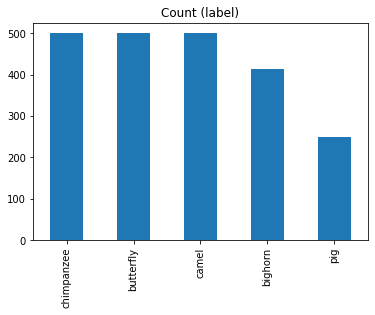

In [6]:
print(df_train.label.value_counts())

df_train.label.value_counts().plot(kind='bar', title='Count (label)');

In [7]:
df_test = pd.read_csv('Group_2/test.csv')

In [8]:
df_test

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,22,36,47,24,38,49,7,21,30,13,...,147,148,153,130,129,135,147,146,151,pig
1,209,245,255,208,244,255,207,245,255,207,...,44,69,12,128,156,98,47,75,17,pig
2,74,104,78,73,103,77,72,102,76,71,...,152,130,117,103,81,68,104,82,68,pig
3,126,118,79,158,150,111,166,159,117,170,...,103,103,77,91,91,65,100,100,74,pig
4,82,63,56,83,63,56,65,45,36,83,...,26,16,4,35,26,11,64,55,40,pig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,176,154,190,176,154,190,177,155,191,177,...,40,26,23,41,30,26,48,37,33,camel
246,198,185,177,198,185,177,199,186,178,199,...,177,170,154,200,193,177,196,190,174,camel
247,238,218,194,222,201,180,235,214,195,246,...,158,157,153,157,157,159,158,159,164,camel
248,190,207,162,67,86,41,80,99,54,100,...,186,165,136,180,159,130,182,161,132,camel


pig           50
chimpanzee    50
butterfly     50
bighorn       50
camel         50
Name: label, dtype: int64


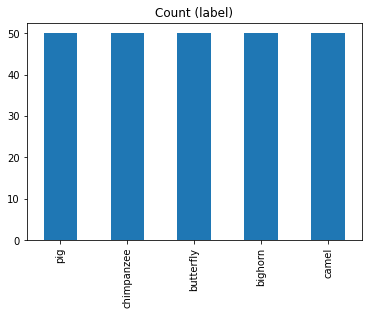

In [9]:
print(df_test.label.value_counts())

df_test.label.value_counts().plot(kind='bar', title='Count (label)');

In [10]:
lab = LabelEncoder()
lab.fit(df_train["label"])
df_train["label"] = lab.transform(df_train["label"])
df_test["label"] = lab.transform(df_test["label"])

In [11]:
df_train

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,0,4,24,165,182,202,174,190,206,158,...,133,138,132,114,119,113,137,142,136,4
1,190,181,176,167,158,153,141,133,130,119,...,113,102,82,151,140,118,129,119,94,4
2,220,214,188,203,197,171,201,194,168,213,...,255,244,235,249,235,226,249,235,226,4
3,75,67,64,65,57,54,74,66,63,68,...,8,0,0,43,32,28,61,47,44,4
4,130,151,120,131,152,121,123,144,113,151,...,130,122,111,83,75,64,166,158,147,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,32,42,17,36,48,24,60,73,53,80,...,83,99,96,87,101,101,152,166,166,2
2160,133,122,130,151,143,154,165,162,169,141,...,46,28,14,83,65,51,100,82,68,2
2161,213,224,226,219,230,232,219,231,231,216,...,194,170,146,51,29,5,181,159,136,2
2162,118,135,117,130,147,128,126,141,122,114,...,146,149,140,146,149,138,146,149,138,2


In [12]:
df_test

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,22,36,47,24,38,49,7,21,30,13,...,147,148,153,130,129,135,147,146,151,4
1,209,245,255,208,244,255,207,245,255,207,...,44,69,12,128,156,98,47,75,17,4
2,74,104,78,73,103,77,72,102,76,71,...,152,130,117,103,81,68,104,82,68,4
3,126,118,79,158,150,111,166,159,117,170,...,103,103,77,91,91,65,100,100,74,4
4,82,63,56,83,63,56,65,45,36,83,...,26,16,4,35,26,11,64,55,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,176,154,190,176,154,190,177,155,191,177,...,40,26,23,41,30,26,48,37,33,2
246,198,185,177,198,185,177,199,186,178,199,...,177,170,154,200,193,177,196,190,174,2
247,238,218,194,222,201,180,235,214,195,246,...,158,157,153,157,157,159,158,159,164,2
248,190,207,162,67,86,41,80,99,54,100,...,186,165,136,180,159,130,182,161,132,2


In [13]:
df_train['label']

0       4
1       4
2       4
3       4
4       4
       ..
2159    2
2160    2
2161    2
2162    2
2163    2
Name: label, Length: 2164, dtype: int64

In [14]:
df_test['label']

0      4
1      4
2      4
3      4
4      4
      ..
245    2
246    2
247    2
248    2
249    2
Name: label, Length: 250, dtype: int64

In [15]:
X_train = df_train.iloc[:,0:-1]
y_train = df_train['label']

print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)
print(X_train)

shape of X = (2164, 12288)
shape of y = (2164,)
      p_0  p_1  p_2  p_3  p_4  p_5  p_6  p_7  p_8  p_9  ...  p_12278  p_12279  \
0       0    4   24  165  182  202  174  190  206  158  ...      177      133   
1     190  181  176  167  158  153  141  133  130  119  ...      115      113   
2     220  214  188  203  197  171  201  194  168  213  ...      230      255   
3      75   67   64   65   57   54   74   66   63   68  ...        0        8   
4     130  151  120  131  152  121  123  144  113  151  ...      137      130   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
2159   32   42   17   36   48   24   60   73   53   80  ...      110       83   
2160  133  122  130  151  143  154  165  162  169  141  ...       27       46   
2161  213  224  226  219  230  232  219  231  231  216  ...      170      194   
2162  118  135  117  130  147  128  126  141  122  114  ...      142      146   
2163  247  249  248  247  249  248  247  249  248  248  ...  

In [16]:
X_train_norm = preprocessing.minmax_scale(X_train)
df_train = pd.DataFrame(X_train_norm, columns=df_train.columns[:-1])
df_train.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.000000,0.015686,0.094118,0.647059,0.713725,0.792157,0.682353,0.745098,0.807843,0.619608,...,0.694118,0.521569,0.541176,0.517647,0.447059,0.466667,0.443137,0.537255,0.556863,0.533333
1,0.745098,0.709804,0.690196,0.654902,0.619608,0.600000,0.552941,0.521569,0.509804,0.466667,...,0.450980,0.443137,0.400000,0.321569,0.592157,0.549020,0.462745,0.505882,0.466667,0.368627
2,0.862745,0.839216,0.737255,0.796078,0.772549,0.670588,0.788235,0.760784,0.658824,0.835294,...,0.901961,1.000000,0.956863,0.921569,0.976471,0.921569,0.886275,0.976471,0.921569,0.886275
3,0.294118,0.262745,0.250980,0.254902,0.223529,0.211765,0.290196,0.258824,0.247059,0.266667,...,0.000000,0.031373,0.000000,0.000000,0.168627,0.125490,0.109804,0.239216,0.184314,0.172549
4,0.509804,0.592157,0.470588,0.513725,0.596078,0.474510,0.482353,0.564706,0.443137,0.592157,...,0.537255,0.509804,0.478431,0.435294,0.325490,0.294118,0.250980,0.650980,0.619608,0.576471


In [17]:
X_test = df_test.iloc[:,0:-1]
y_test = df_test['label']

print("shape of X =", X_test.shape)
print("shape of y =", y_test.shape)
print(X_test)

shape of X = (250, 12288)
shape of y = (250,)
     p_0  p_1  p_2  p_3  p_4  p_5  p_6  p_7  p_8  p_9  ...  p_12278  p_12279  \
0     22   36   47   24   38   49    7   21   30   13  ...      158      147   
1    209  245  255  208  244  255  207  245  255  207  ...       41       44   
2     74  104   78   73  103   77   72  102   76   71  ...       67      152   
3    126  118   79  158  150  111  166  159  117  170  ...       91      103   
4     82   63   56   83   63   56   65   45   36   83  ...       27       26   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
245  176  154  190  176  154  190  177  155  191  177  ...       24       40   
246  198  185  177  198  185  177  199  186  178  199  ...      152      177   
247  238  218  194  222  201  180  235  214  195  246  ...       91      158   
248  190  207  162   67   86   41   80   99   54  100  ...      115      186   
249  142  130  114  119  107   91  113  102   84  122  ...       56      1

In [18]:
X_test_norm = preprocessing.minmax_scale(X_test)
df_test = pd.DataFrame(X_test_norm, columns=df_test.columns[:-1])
df_test.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.086275,0.141176,0.184314,0.094118,0.149020,0.192157,0.027451,0.082353,0.117647,0.050980,...,0.619608,0.576471,0.580392,0.600000,0.509804,0.505882,0.529412,0.576471,0.572549,0.592157
1,0.819608,0.960784,1.000000,0.815686,0.956863,1.000000,0.811765,0.960784,1.000000,0.811765,...,0.160784,0.172549,0.270588,0.047059,0.501961,0.611765,0.384314,0.184314,0.294118,0.066667
2,0.290196,0.407843,0.305882,0.286275,0.403922,0.301961,0.282353,0.400000,0.298039,0.278431,...,0.262745,0.596078,0.509804,0.458824,0.403922,0.317647,0.266667,0.407843,0.321569,0.266667
3,0.494118,0.462745,0.309804,0.619608,0.588235,0.435294,0.650980,0.623529,0.458824,0.666667,...,0.356863,0.403922,0.403922,0.301961,0.356863,0.356863,0.254902,0.392157,0.392157,0.290196
4,0.321569,0.247059,0.219608,0.325490,0.247059,0.219608,0.254902,0.176471,0.141176,0.325490,...,0.105882,0.101961,0.062745,0.015686,0.137255,0.101961,0.043137,0.250980,0.215686,0.156863


In [19]:
model = linear_model.LogisticRegression(C=1, fit_intercept=True,solver='lbfgs', max_iter=100)
model = model.fit(X_train_norm, y_train)

y_predict = model.predict(X_test_norm)

acc_training = np.mean(y_train == model.predict(X_train_norm))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 95.97966728280961
Testing accuracy (%) = 53.2


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
cnf_matrix=confusion_matrix(y_test,y_predict)
print(cnf_matrix)

[[15  1 12 18  4]
 [ 1 44  4  0  1]
 [ 6  2 33  6  3]
 [ 7  2  6 33  2]
 [10  5 11 16  8]]


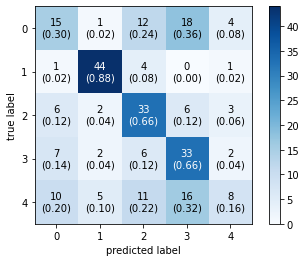

In [21]:
plot_confusion_matrix(conf_mat=cnf_matrix,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [22]:
def calc(cnf_matrix):
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)
  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)

  # Specificity or true negative rate
  TNR = TN/(TN+FP) 

  # Precision or positive predictive value
  PPV = TP/(TP+FP)

  # Negative predictive value
  NPV = TN/(TN+FN)

  # F1 Score
  F1 = 2*((PPV)*(TPR)/(PPV + TPR))  
  
  return TPR, TNR, PPV, NPV, F1
  
TPR, TNR, PPV, NPV, F1= calc(cnf_matrix)

In [23]:
first = []
second = []
third = []
fourth = []
fifth = []
t=[]

t_ML2=[]
t_ML2_v2=[]


def formTable(a):
  
  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    if i == 1:
      second.append(round(a[i],2))
    if i == 2:
      third.append(round(a[i],2))
    if i == 3:
      fourth.append(round(a[i],2))
    if i == 4:
      fifth.append(round(a[i],2))

formTable(TPR)
formTable(TNR)
formTable(PPV)
formTable(NPV)
formTable(F1)

t.append(first)
t.append(second)
t.append(third)
t.append(fourth)
t.append(fifth)
# print(t)

In [24]:

slst=[]
slst_ML2=[]
slst_ML2_t6 =[]
def formt(t):
  s0=0
  s1=0
  s2=0
  s3=0
  s4=0
  

  for i in range(len(t)+1):
    for j in range(len(t)):
      if i!=0:
        break
      else:
        s0+= t[j][i]
      avg_s0 = s0/len(t)
    for j in range(len(t)):
      if i!=1:
        break
      else:
        s1+= t[j][i]
      avg_s1 = s1/len(t)
    for j in range(len(t)):
      if i!=2:
        break
      else:
        s2+= t[j][i]
      avg_s2 = s2/len(t)
    for j in range(len(t)):
      if i!=3:
        break
      else:
        s3+= t[j][i]
      avg_s3 = s3/len(t)
    for j in range(len(t)):
      if i!=4:
        break
      else:
        s4+= t[j][i]
      avg_s4 = s4/len(t)
  
  slst.append(round(avg_s0,2))
  slst.append(round(avg_s1,2))
  slst.append(round(avg_s2,2))
  slst.append(round(avg_s3,2))
  slst.append(round(avg_s4,2))
  # print(slst)
  t.append(slst)
  return t
formt(t)

[[0.3, 0.88, 0.38, 0.83, 0.34],
 [0.88, 0.95, 0.81, 0.97, 0.85],
 [0.66, 0.84, 0.5, 0.91, 0.57],
 [0.66, 0.8, 0.45, 0.9, 0.54],
 [0.16, 0.95, 0.44, 0.82, 0.24],
 [0.53, 0.88, 0.52, 0.89, 0.51]]

In [25]:
df = pd.DataFrame(t, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.30         0.88  0.38  0.83      0.34
1           0.88         0.95  0.81  0.97      0.85
2           0.66         0.84  0.50  0.91      0.57
3           0.66         0.80  0.45  0.90      0.54
4           0.16         0.95  0.44  0.82      0.24
avg         0.53         0.88  0.52  0.89      0.51


**Milestone 2**

**Task - 2**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

In [27]:
# Flatten the inputs
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], -1)

In [28]:
# Convert the target to one-hot encoding
number_of_classes = 5
y_train = to_categorical(y_train, num_classes=number_of_classes) 
y_test = to_categorical(y_test, num_classes=number_of_classes) 


print("shape of X =", X_train_norm.shape)
print("shape of y =", y_train.shape)

shape of X = (2164, 12288)
shape of y = (2164, 5)


In [29]:
model = Sequential()
model.add( Input(shape = (12288,)) )
model.add( Dense(512, activation='sigmoid') ) #hidden layer
model.add( Dense(64, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

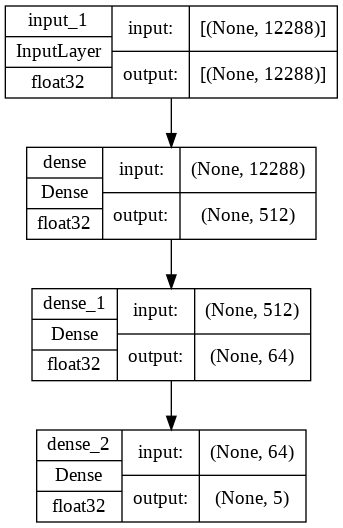

In [31]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [32]:
# Trainning the model
model.fit(X_train_norm, y_train, epochs=200, verbose=1)

Epoch 1/200
68/68 [==============================] - 3s 4ms/step - loss: 1.5417 - accuracy: 0.3637
Epoch 2/200
68/68 [==============================] - 0s 4ms/step - loss: 1.3127 - accuracy: 0.4399
Epoch 3/200
68/68 [==============================] - 0s 4ms/step - loss: 1.2498 - accuracy: 0.4690
Epoch 4/200
68/68 [==============================] - 0s 4ms/step - loss: 1.2151 - accuracy: 0.4908
Epoch 5/200
68/68 [==============================] - 0s 4ms/step - loss: 1.1889 - accuracy: 0.5009
Epoch 6/200
68/68 [==============================] - 0s 5ms/step - loss: 1.1780 - accuracy: 0.4991
Epoch 7/200
68/68 [==============================] - 0s 4ms/step - loss: 1.1806 - accuracy: 0.5152
Epoch 8/200
68/68 [==============================] - 0s 6ms/step - loss: 1.1510 - accuracy: 0.5323
Epoch 9/200
68/68 [==============================] - 0s 5ms/step - loss: 1.1400 - accuracy: 0.5250
Epoch 10/200
68/68 [==============================] - 0s 5ms/step - loss: 1.1400 - accuracy: 0.5434
Epoch 11/

In [33]:
y_pred = model.predict(X_test_norm)

8/8 [==============================] - 0s 2ms/step


In [34]:
y_predicted = np.argmax(y_pred, axis=1)

In [35]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [36]:
acc_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", acc_testing)

Testing accuracy (%) = 47.199999999999996


In [37]:
# loss_test, pred_test = model.evaluate(X_test_norm, y_test)
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print("Testing accuracy (%) =", test_acc)

8/8 [==============================] - 0s 3ms/step - loss: 1.5878 - accuracy: 0.4720
Testing accuracy (%) = 0.47200000286102295


In [38]:
cnf_matrix_ML2=confusion_matrix(y_actual,y_predicted)
print(cnf_matrix_ML2)

[[23  0 11 11  5]
 [ 7 37  0  3  3]
 [23  1 17  6  3]
 [ 4  2  6 34  4]
 [21  2  3 17  7]]


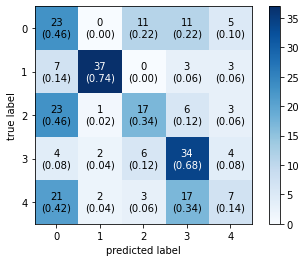

In [39]:
plot_confusion_matrix(conf_mat=cnf_matrix_ML2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [40]:
TPR_ML2, TNR_ML2, PPV_ML2, NPV_ML2, F1_ML2= calc(cnf_matrix_ML2)

In [41]:
first = []
second = []
third = []
fourth = []
fifth = []


formTable(TPR_ML2)
formTable(TNR_ML2)
formTable(PPV_ML2)
formTable(NPV_ML2)
formTable(F1_ML2)

t_ML2.append(first)
t_ML2.append(second)
t_ML2.append(third)
t_ML2.append(fourth)
t_ML2.append(fifth)

In [42]:
slst=[]
formt(t_ML2)

[[0.46, 0.72, 0.29, 0.84, 0.36],
 [0.74, 0.98, 0.88, 0.94, 0.8],
 [0.34, 0.9, 0.46, 0.85, 0.39],
 [0.68, 0.82, 0.48, 0.91, 0.56],
 [0.14, 0.92, 0.32, 0.81, 0.19],
 [0.47, 0.87, 0.49, 0.87, 0.46]]

In [43]:
df_ML2 = pd.DataFrame(t_ML2, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df_ML2)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.46         0.72  0.29  0.84      0.36
1           0.74         0.98  0.88  0.94      0.80
2           0.34         0.90  0.46  0.85      0.39
3           0.68         0.82  0.48  0.91      0.56
4           0.14         0.92  0.32  0.81      0.19
avg         0.47         0.87  0.49  0.87      0.46


**Task 3 - Over Sampling** 

In [44]:
df_train = pd.read_csv('Group_2/train.csv')
df_test = pd.read_csv('Group_2/test.csv')

In [45]:
df_train['label'].value_counts()


chimpanzee    500
butterfly     500
camel         500
bighorn       414
pig           250
Name: label, dtype: int64

In [46]:
df_test['label'].value_counts()

pig           50
chimpanzee    50
butterfly     50
bighorn       50
camel         50
Name: label, dtype: int64

In [47]:
lab = LabelEncoder()
lab.fit(df_train["label"])
df_train["label"] = lab.transform(df_train["label"])
df_test["label"] = lab.transform(df_test["label"])

In [48]:
# Class count
count_class_0, count_class_1,count_class_2,count_class_3,count_class_4 = df_train.label.value_counts()
print(df_train.label.value_counts())

3    500
1    500
2    500
0    414
4    250
Name: label, dtype: int64


In [49]:
# Divide by class
df_class_0 = df_train[df_train['label'] == 2]
df_class_1 = df_train[df_train['label'] == 3]
df_class_2 = df_train[df_train['label'] == 1]
df_class_3 = df_train[df_train['label'] == 0]
df_class_4 = df_train[df_train['label'] == 4]

Random over-sampling:
2    500
3    500
1    500
0    500
4    500
Name: label, dtype: int64


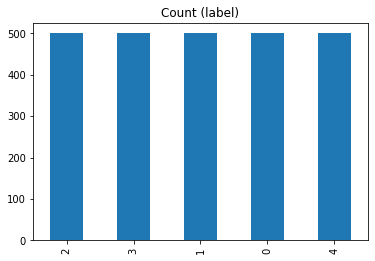

In [50]:
df_class_3_over = df_class_3.sample(count_class_1, replace=True)
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
df_train= pd.concat([df_class_0,df_class_1,df_class_2,df_class_3_over, df_class_4_over], axis=0)

print('Random over-sampling:')
print(df_train.label.value_counts())

df_train.label.value_counts().plot(kind='bar', title='Count (label)');

In [51]:
df_train

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
1664,187,188,183,65,66,61,67,68,63,20,...,128,104,102,67,41,40,84,58,57,2
1665,37,39,28,27,29,18,26,28,17,40,...,177,142,104,211,176,138,203,168,130,2
1666,109,134,154,77,99,120,138,160,181,69,...,200,191,182,216,207,198,219,210,201,2
1667,215,213,216,199,197,200,220,218,221,198,...,193,167,150,196,179,161,189,178,158,2
1668,248,254,254,249,254,255,250,255,255,251,...,208,187,120,198,177,110,201,180,113,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,216,234,248,215,233,247,218,234,247,224,...,91,98,21,135,142,64,70,77,0,4
115,51,46,27,94,89,70,68,63,44,64,...,130,119,97,128,117,95,110,99,77,4
77,210,187,173,212,189,175,210,187,173,207,...,20,15,11,27,22,18,37,32,28,4
18,38,38,38,56,56,56,49,49,49,39,...,241,237,234,221,216,212,236,229,223,4


In [52]:
X_train = df_train.iloc[:,0:-1]
y_train = df_train['label']

print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)
print(X_train)

shape of X = (2500, 12288)
shape of y = (2500,)
      p_0  p_1  p_2  p_3  p_4  p_5  p_6  p_7  p_8  p_9  ...  p_12278  p_12279  \
1664  187  188  183   65   66   61   67   68   63   20  ...       79      128   
1665   37   39   28   27   29   18   26   28   17   40  ...      143      177   
1666  109  134  154   77   99  120  138  160  181   69  ...      176      200   
1667  215  213  216  199  197  200  220  218  221  198  ...      172      193   
1668  248  254  254  249  254  255  250  255  255  251  ...      110      208   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
187   216  234  248  215  233  247  218  234  247  224  ...       61       91   
115    51   46   27   94   89   70   68   63   44   64  ...       92      130   
77    210  187  173  212  189  175  210  187  173  207  ...       13       20   
18     38   38   38   56   56   56   49   49   49   39  ...      239      241   
86    255  254  228  161  154  128  116  101   78   91  ...  

In [53]:
X_train_norm = preprocessing.minmax_scale(X_train)
df_train = pd.DataFrame(X_train_norm, columns=df_train.columns[:-1])
df_train.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.733333,0.737255,0.717647,0.254902,0.258824,0.239216,0.262745,0.266667,0.247059,0.078431,...,0.309804,0.501961,0.407843,0.400000,0.262745,0.160784,0.156863,0.329412,0.227451,0.223529
1,0.145098,0.152941,0.109804,0.105882,0.113725,0.070588,0.101961,0.109804,0.066667,0.156863,...,0.560784,0.694118,0.556863,0.407843,0.827451,0.690196,0.541176,0.796078,0.658824,0.509804
2,0.427451,0.525490,0.603922,0.301961,0.388235,0.470588,0.541176,0.627451,0.709804,0.270588,...,0.690196,0.784314,0.749020,0.713725,0.847059,0.811765,0.776471,0.858824,0.823529,0.788235
3,0.843137,0.835294,0.847059,0.780392,0.772549,0.784314,0.862745,0.854902,0.866667,0.776471,...,0.674510,0.756863,0.654902,0.588235,0.768627,0.701961,0.631373,0.741176,0.698039,0.619608
4,0.972549,0.996078,0.996078,0.976471,0.996078,1.000000,0.980392,1.000000,1.000000,0.984314,...,0.431373,0.815686,0.733333,0.470588,0.776471,0.694118,0.431373,0.788235,0.705882,0.443137


In [54]:
X_test = df_test.iloc[:,0:-1]
y_test = df_test['label']

print("shape of X =", X_test.shape)
print("shape of y =", y_test.shape)
print(X_test)

shape of X = (250, 12288)
shape of y = (250,)
     p_0  p_1  p_2  p_3  p_4  p_5  p_6  p_7  p_8  p_9  ...  p_12278  p_12279  \
0     22   36   47   24   38   49    7   21   30   13  ...      158      147   
1    209  245  255  208  244  255  207  245  255  207  ...       41       44   
2     74  104   78   73  103   77   72  102   76   71  ...       67      152   
3    126  118   79  158  150  111  166  159  117  170  ...       91      103   
4     82   63   56   83   63   56   65   45   36   83  ...       27       26   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
245  176  154  190  176  154  190  177  155  191  177  ...       24       40   
246  198  185  177  198  185  177  199  186  178  199  ...      152      177   
247  238  218  194  222  201  180  235  214  195  246  ...       91      158   
248  190  207  162   67   86   41   80   99   54  100  ...      115      186   
249  142  130  114  119  107   91  113  102   84  122  ...       56      1

In [55]:
X_test_norm = preprocessing.minmax_scale(X_test)
df_test = pd.DataFrame(X_test_norm, columns=df_test.columns[:-1])
df_test.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.086275,0.141176,0.184314,0.094118,0.149020,0.192157,0.027451,0.082353,0.117647,0.050980,...,0.619608,0.576471,0.580392,0.600000,0.509804,0.505882,0.529412,0.576471,0.572549,0.592157
1,0.819608,0.960784,1.000000,0.815686,0.956863,1.000000,0.811765,0.960784,1.000000,0.811765,...,0.160784,0.172549,0.270588,0.047059,0.501961,0.611765,0.384314,0.184314,0.294118,0.066667
2,0.290196,0.407843,0.305882,0.286275,0.403922,0.301961,0.282353,0.400000,0.298039,0.278431,...,0.262745,0.596078,0.509804,0.458824,0.403922,0.317647,0.266667,0.407843,0.321569,0.266667
3,0.494118,0.462745,0.309804,0.619608,0.588235,0.435294,0.650980,0.623529,0.458824,0.666667,...,0.356863,0.403922,0.403922,0.301961,0.356863,0.356863,0.254902,0.392157,0.392157,0.290196
4,0.321569,0.247059,0.219608,0.325490,0.247059,0.219608,0.254902,0.176471,0.141176,0.325490,...,0.105882,0.101961,0.062745,0.015686,0.137255,0.101961,0.043137,0.250980,0.215686,0.156863


In [56]:
print("shape of X =", X_train_norm.shape)
print("shape of y =", y_train.shape)

shape of X = (2500, 12288)
shape of y = (2500,)


In [57]:
# Flatten the inputs
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], -1)

# Convert the target to one-hot encoding
number_of_classes = 5
y_train = to_categorical(y_train, num_classes=number_of_classes) 
y_test = to_categorical(y_test, num_classes=number_of_classes) 


print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)

shape of X = (2500, 12288)
shape of y = (2500, 5)


In [58]:
model = Sequential()
model.add( Input(shape = (12288,)) )
model.add( Dense(512, activation='sigmoid') ) #hidden layer
model.add( Dense(64, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [59]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

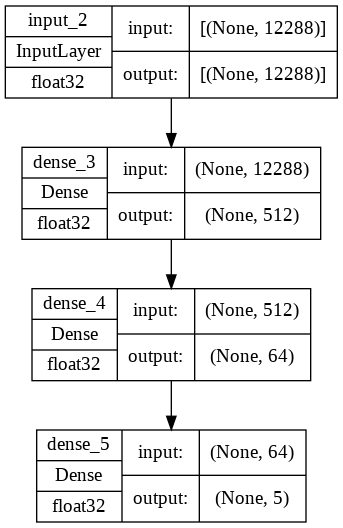

In [60]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [61]:
model.fit(X_train_norm, y_train, epochs=200, verbose=1)

Epoch 1/200
79/79 [==============================] - 1s 4ms/step - loss: 1.4466 - accuracy: 0.3904
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 1.2955 - accuracy: 0.4336
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 1.2662 - accuracy: 0.4424
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 1.2395 - accuracy: 0.4832
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 1.2072 - accuracy: 0.4872
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 1.1808 - accuracy: 0.4972
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 1.1887 - accuracy: 0.5084
Epoch 8/200
79/79 [==============================] - 0s 4ms/step - loss: 1.1636 - accuracy: 0.5192
Epoch 9/200
79/79 [==============================] - 0s 4ms/step - loss: 1.1748 - accuracy: 0.5104
Epoch 10/200
79/79 [==============================] - 0s 4ms/step - loss: 1.1369 - accuracy: 0.5300
Epoch 11/

In [62]:
y_pred = model.predict(X_test_norm)

8/8 [==============================] - 0s 2ms/step


In [63]:
y_predicted = np.argmax(y_pred, axis=1)

In [64]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [65]:
acc_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", acc_testing)

Testing accuracy (%) = 54.800000000000004


In [66]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print("Testing accuracy (%) =", test_acc)

8/8 [==============================] - 0s 3ms/step - loss: 1.6331 - accuracy: 0.5480
Testing accuracy (%) = 0.5479999780654907


In [67]:
cnf_matrix_ML2_v2=confusion_matrix(y_actual,y_predicted)
print(cnf_matrix_ML2_v2)

[[20  0  8 18  4]
 [ 1 45  2  0  2]
 [14  2 21  7  6]
 [ 4  1  3 39  3]
 [10  5  5 18 12]]


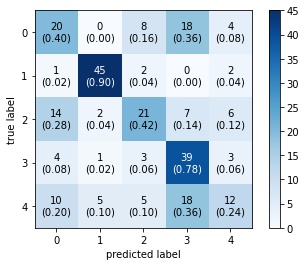

In [68]:
plot_confusion_matrix(conf_mat=cnf_matrix_ML2_v2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [69]:
TPR_ML2_v2, TNR_ML2_v2, PPV_ML2_v2, NPV_ML2_v2, F1_ML2_v2 = calc(cnf_matrix_ML2_v2)

In [70]:
first = []
second = []
third = []
fourth = []
fifth = []

formTable(TPR_ML2_v2)
formTable(TNR_ML2_v2)
formTable(PPV_ML2_v2)
formTable(NPV_ML2_v2)
formTable(F1_ML2_v2)

t_ML2_v2.append(first)
t_ML2_v2.append(second)
t_ML2_v2.append(third)
t_ML2_v2.append(fourth)
t_ML2_v2.append(fifth)


In [71]:
print(t_ML2_v2)

[[0.4, 0.86, 0.41, 0.85, 0.4], [0.9, 0.96, 0.85, 0.97, 0.87], [0.42, 0.91, 0.54, 0.86, 0.47], [0.78, 0.78, 0.48, 0.93, 0.59], [0.24, 0.92, 0.44, 0.83, 0.31]]


In [72]:
slst=[]
formt(t_ML2_v2)

[[0.4, 0.86, 0.41, 0.85, 0.4],
 [0.9, 0.96, 0.85, 0.97, 0.87],
 [0.42, 0.91, 0.54, 0.86, 0.47],
 [0.78, 0.78, 0.48, 0.93, 0.59],
 [0.24, 0.92, 0.44, 0.83, 0.31],
 [0.55, 0.89, 0.54, 0.89, 0.53]]

In [73]:
df_ML2_v2 = pd.DataFrame(t_ML2_v2, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df_ML2_v2)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.40         0.86  0.41  0.85      0.40
1           0.90         0.96  0.85  0.97      0.87
2           0.42         0.91  0.54  0.86      0.47
3           0.78         0.78  0.48  0.93      0.59
4           0.24         0.92  0.44  0.83      0.31
avg         0.55         0.89  0.54  0.89      0.53


Task 6

In [88]:
from tensorflow import keras 
from tensorflow.keras import layers 
!pip install keras-tuner -q
import keras_tuner

     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 43.9 MB/s 


In [89]:
def build_model(hp):
    model = Sequential()
    model.add( Input(shape = (12288,)) )
    number_of_layers = hp.Int("num_layers",2, 5)
    for i in range(number_of_layers):
      units = hp.Int(f"units_{i}", min_value=16, max_value=128, step=16)
      activation = hp.Choice("activation", ["relu","sigmoid"])  
      model.add( Dense(units, activation=activation) ) #hidden layer
    
    model.add( Dense(5, activation='softmax') ) #output layer, activation must be softmax
   
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"],
    )
    return model

In [90]:
model = build_model(keras_tuner.HyperParameters())

In [91]:
from keras_tuner import BayesianOptimization

In [92]:
tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=100,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    seed=None,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    
)

In [93]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}


In [94]:
X_train_new,X_val, y_train_new,y_val = train_test_split(X_train_norm,y_train,test_size=0.2,stratify=y_train)

In [95]:
tuner.search(X_train_new, y_train_new, epochs=100, validation_data=(X_val, y_val))

Trial 100 Complete [00h 00m 42s]
val_accuracy: 0.7739999890327454

Best val_accuracy So Far: 0.8100000023841858
Total elapsed time: 01h 12m 06s


In [96]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 80
activation: relu
units_1: 64
units_2: 128
units_3: 128
units_4: 128
Score: 0.8100000023841858
Trial summary
Hyperparameters:
num_layers: 5
units_0: 112
activation: relu
units_1: 128
units_2: 64
units_3: 128
units_4: 128
Score: 0.8040000200271606
Trial summary
Hyperparameters:
num_layers: 2
units_0: 128
activation: relu
units_1: 128
units_2: 128
units_3: 128
units_4: 48
Score: 0.8019999861717224
Trial summary
Hyperparameters:
num_layers: 2
units_0: 128
activation: relu
units_1: 80
units_2: 128
units_3: 16
units_4: 48
Score: 0.7979999780654907
Trial summary
Hyperparameters:
num_layers: 3
units_0: 64
activation: relu
units_1: 80
units_2: 128
units_3: 16
units_4: 128
Score: 0.7960000038146973
Trial summary
Hyperparameters:
num_layers: 4
units_0: 80
activation: relu
units_1: 48
units_2: 128
units_3: 128
units_4: 128
Score: 0.7940000295639038
Trial summary
Hyperparame

In [97]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [98]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_new, y_train_new, epochs=100, validation_data=(X_val, y_val))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
63/63 [==============================] - 1s 8ms/step - loss: 1.4787 - accuracy: 0.3215 - val_loss: 1.2991 - val_accuracy: 0.4020
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 1.2656 - accuracy: 0.4370 - val_loss: 1.2145 - val_accuracy: 0.4540
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 1.1936 - accuracy: 0.4740 - val_loss: 1.1410 - val_accuracy: 0.4960
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 1.1297 - accuracy: 0.5130 - val_loss: 1.1237 - val_accuracy: 0.5300
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 1.0667 - accuracy: 0.5525 - val_loss: 1.1352 - val_accuracy: 0.5240
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 1.0509 - accuracy: 0.5550 - val_loss: 1.0575 - val_accuracy: 0.5680
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 0.9467 - accuracy: 0.6060 - val_loss: 1.0163 - val_accuracy: 0.5920
Epoch 8/100
6

In [99]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train_new, y_train_new, epochs=best_epoch, validation_data=(X_val, y_val))

Epoch 1/96
63/63 [==============================] - 1s 8ms/step - loss: 1.4328 - accuracy: 0.3525 - val_loss: 1.3396 - val_accuracy: 0.4220
Epoch 2/96
63/63 [==============================] - 0s 5ms/step - loss: 1.2717 - accuracy: 0.4260 - val_loss: 1.2540 - val_accuracy: 0.4360
Epoch 3/96
63/63 [==============================] - 0s 5ms/step - loss: 1.1734 - accuracy: 0.4955 - val_loss: 1.1459 - val_accuracy: 0.4880
Epoch 4/96
63/63 [==============================] - 0s 5ms/step - loss: 1.1854 - accuracy: 0.4795 - val_loss: 1.1711 - val_accuracy: 0.4780
Epoch 5/96
63/63 [==============================] - 0s 5ms/step - loss: 1.0494 - accuracy: 0.5560 - val_loss: 1.0999 - val_accuracy: 0.5580
Epoch 6/96
63/63 [==============================] - 0s 4ms/step - loss: 0.9988 - accuracy: 0.5945 - val_loss: 1.1537 - val_accuracy: 0.5260
Epoch 7/96
63/63 [==============================] - 0s 5ms/step - loss: 1.0095 - accuracy: 0.5750 - val_loss: 1.1505 - val_accuracy: 0.5420
Epoch 8/96
63/63 [==

In [100]:
eval_result = hypermodel.evaluate(X_test_norm, y_test)
print("[test loss, test accuracy]:", eval_result)

8/8 [==============================] - 0s 3ms/step - loss: 4.0266 - accuracy: 0.5080
[test loss, test accuracy]: [4.026622772216797, 0.5080000162124634]
